*<h3>Data Loading</h3>*

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('supermarket-sales.csv')
df

,Order ID,Customer Name,Category,Subcategory,City,Orderdate,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


*<h3>Preprocessing</h3>*
**1.Removing_useless_columns**

In [4]:
df = df.drop(["State","Customer Name","Discount","Order ID","Profit"], axis=1)

**2.Fetching_day_month_year_and_dropping_date**

In [5]:
df['Orderdate'] = pd.to_datetime(df['Orderdate'], format='mixed', dayfirst=True, errors='coerce')
df['year'] = df['Orderdate'].dt.year
df['month'] = df['Orderdate'].dt.month
df['day'] = df['Orderdate'].dt.day
df["weekday"] = df["Orderdate"].dt.weekday
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)
df =df.sort_values('Orderdate')
df

,Category,Subcategory,City,Orderdate,Region,Sales,year,month,day,weekday,is_weekend
540,Beverages,Soft Drinks,Trichy,2015-01-02,Central,1338,2015,1,2,4,0
8548,Beverages,Health Drinks,Bodi,2015-01-03,Central,1818,2015,1,3,5,1
3409,Fruits & Veggies,Fresh Vegetables,Karur,2015-01-03,Central,851,2015,1,3,5,1
9168,Snacks,Chocolates,Cumbum,2015-01-03,Central,1822,2015,1,3,5,1
3376,Beverages,Soft Drinks,Theni,2015-01-03,Central,1228,2015,1,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...
908,Snacks,Chocolates,Theni,2018-12-30,East,1167,2018,12,30,6,1
645,"Eggs, Meat & Fish",Eggs,Nagercoil,2018-12-30,Central,1656,2018,12,30,6,1
4696,Beverages,Soft Drinks,Ramanadhapuram,2018-12-30,West,1690,2018,12,30,6,1
906,Snacks,Chocolates,Tirunelveli,2018-12-30,East,1240,2018,12,30,6,1


**3.Unique_Values**

In [6]:
print(len(df.Category.unique()), 
      len(df.Subcategory.unique()), 
      len(df.Region.unique()), 
      len(df.year.unique()),
      len(df.City.unique()))

7 23 5 4 24


**4.Null_value_checking**

In [7]:
df.isna().sum()

Category       0
Subcategory    0
City           0
Orderdate      0
Region         0
Sales          0
year           0
month          0
day            0
weekday        0
is_weekend     0
dtype: int64

**5.Get dummies**

In [8]:
df = pd.get_dummies(df, columns=["Category", "Subcategory", "City", "Region"], drop_first=True)
df

,Orderdate,Sales,year,month,day,weekday,is_weekend,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,...,City_Theni,City_Tirunelveli,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West
540,2015-01-02,1338,2015,1,2,4,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
8548,2015-01-03,1818,2015,1,3,5,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3409,2015-01-03,851,2015,1,3,5,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9168,2015-01-03,1822,2015,1,3,5,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3376,2015-01-03,1228,2015,1,3,5,1,True,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2018-12-30,1167,2018,12,30,6,1,False,False,False,...,True,False,False,False,False,False,True,False,False,False
645,2018-12-30,1656,2018,12,30,6,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4696,2018-12-30,1690,2018,12,30,6,1,True,False,False,...,False,False,False,False,False,False,False,False,False,True
906,2018-12-30,1240,2018,12,30,6,1,False,False,False,...,False,True,False,False,False,False,True,False,False,False


*<h3>Visualizing</h3>*

array([[<Axes: title={'center': 'Orderdate'}>,
        <Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'is_weekend'}>, <Axes: >, <Axes: >]],
      dtype=object)

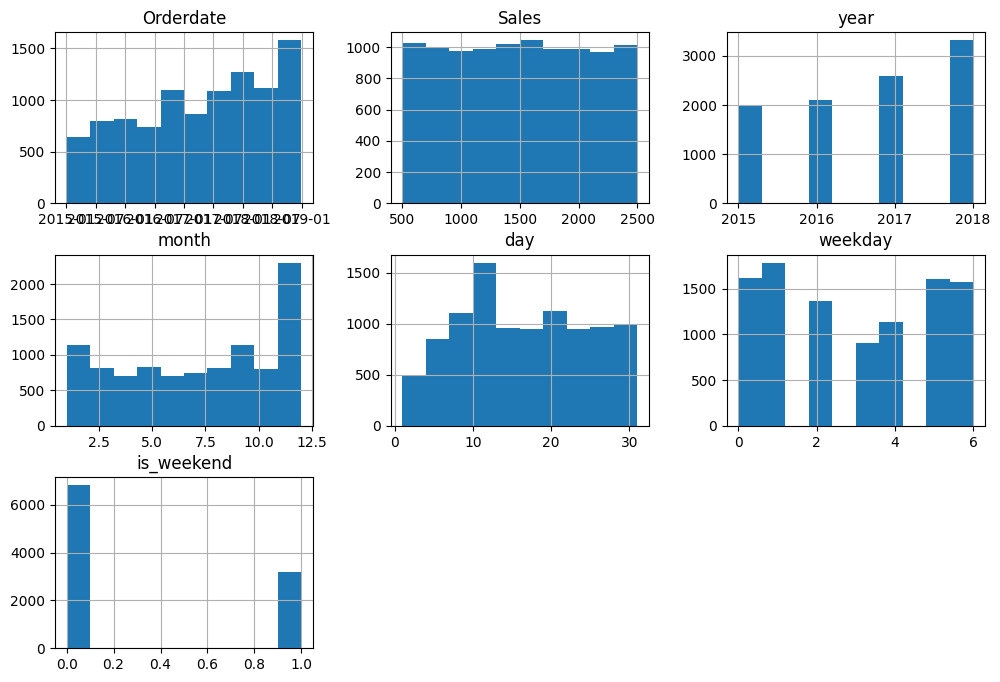

In [9]:
df.hist(figsize=(12,8))

*<h3>Model Selection, Manual spliting and training</h3>*

In [10]:
X, y = df.drop(["Sales","Orderdate"],axis=1), df["Sales"]

In [23]:
#manually spliting because of time-series data
split_point = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [25]:
tscv = TimeSeriesSplit(n_splits=5)

In [26]:
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

In [27]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    rf, param_grid, cv=tscv, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=2
)

In [28]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [37]:
y_pred = best_rf.predict(X_test)
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
mean_absolute_error(y_test, y_pred) #aim to minimize till 0

502.68956876306817

In [36]:
mean_squared_error(y_test, y_pred) #aim to minimize till 0

339590.0622966094

In [33]:
r2_score(y_pred,y_test) #aim to maximize till 1

-456.1563231572943

*<h3>Hyper-parameter tunning</h3>*

In [ ]:
param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[10,20,30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr_cv = GridSearchCV(rfr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train,y_train)

In [ ]:
y_pred = rfr_cv.predict(X_test)

In [ ]:
mean_absolute_error(y_pred,y_test)

498.0913286395116

In [ ]:
mean_squared_error(y_pred,y_test)

334114.5040971854

In [ ]:
r2_score(y_pred,y_test)

-140.35369153664345